In [ ]:
# By zaimportować moduły z głównego folderu
%cd ..

In [101]:
import import_ipynb
import tensorflow as tf
import numpy as np

from models.model import create_model
from data_preprocessing import split_working_faulty_blocks, time_chunks_split, train_test_split_with_reshape

working_blocks_df, faulty_blocks_df = split_working_faulty_blocks(True)


chunk_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]
experiments = []

for i in range(0, 10):
  accuracy_results = []
  for chunk_size in chunk_sizes:
    X, y = time_chunks_split(working_blocks_df, faulty_blocks_df, chunk_size=chunk_size)
    X_train, X_test, y_train, y_test = train_test_split_with_reshape(X, y)
    model = create_model(learning_rate=0.002, chunk_size=chunk_size)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

    history = model.fit(X_train, y_train, epochs=100, callbacks=[], verbose=0)
    accuracy = history.history['accuracy'][-1]
    print(f'chunk_size={chunk_size}, accuracy={accuracy}')
    accuracy_results.append(history.history['accuracy'])
  experiments.append(accuracy_results)


chunk_size=1, accuracy=0.8242862820625305
chunk_size=2, accuracy=0.9147224426269531
chunk_size=3, accuracy=0.9275362491607666
chunk_size=4, accuracy=0.9597423672676086
chunk_size=5, accuracy=0.9032257795333862
chunk_size=6, accuracy=0.9734299778938293
chunk_size=7, accuracy=0.895480215549469
chunk_size=8, accuracy=0.9645161032676697
chunk_size=9, accuracy=0.8913043737411499
chunk_size=10, accuracy=0.9395161271095276
chunk_size=15, accuracy=0.7575757503509521
chunk_size=1, accuracy=0.8021712899208069
chunk_size=2, accuracy=0.9517297148704529
chunk_size=3, accuracy=0.9263284802436829
chunk_size=4, accuracy=0.9210950136184692
chunk_size=5, accuracy=0.9455645084381104
chunk_size=6, accuracy=0.9613526463508606
chunk_size=7, accuracy=0.6525423526763916
chunk_size=8, accuracy=0.9580644965171814
chunk_size=9, accuracy=0.9818840622901917
chunk_size=10, accuracy=0.9395161271095276
chunk_size=15, accuracy=0.678787887096405
chunk_size=1, accuracy=0.8146361112594604
chunk_size=2, accuracy=0.9404666

In [105]:
results_by_chunk_size = [[] for chunk_size in chunk_sizes]

for experiment in experiments:
  for i, chunk_size_result in enumerate(experiment):
    results_by_chunk_size[i].append(chunk_size_result)

average_results = []
maximums = []
minimums = []
for chunk_size_results in results_by_chunk_size:
  average_results.append(np.average(chunk_size_results, axis=0))
  maximums.append(np.max([result[-1] for result in chunk_size_results]))
  minimums.append(np.min([result[-1] for result in chunk_size_results]))


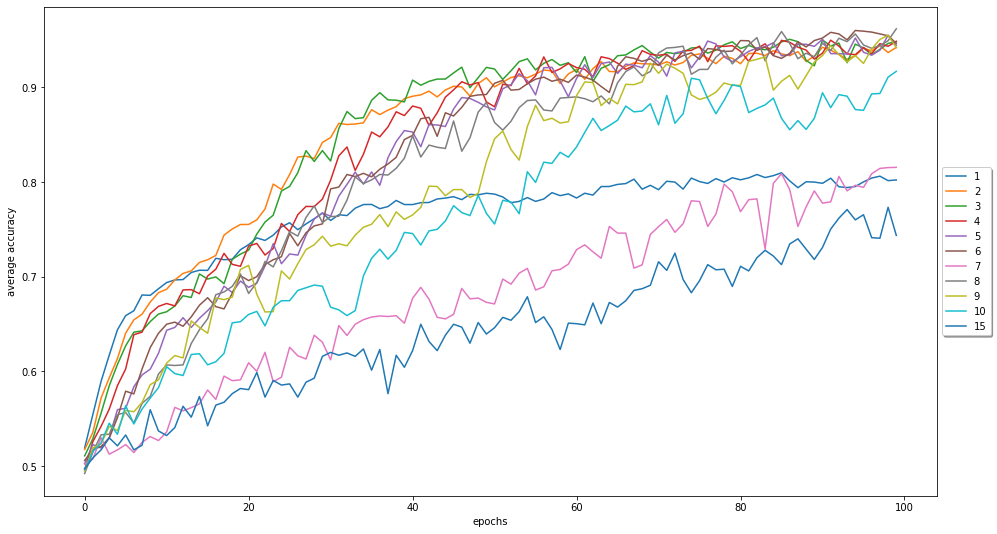

In [106]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

plt.figure(figsize=[16, 9])
for results in average_results:
  plt.plot(results)
plt.xlabel('epochs')
plt.ylabel('average accuracy')
plt.legend(chunk_sizes, loc='center left', bbox_to_anchor=(1, 0.5), shadow=True)

In [107]:
for i, average_result in enumerate(average_results):
  print(f'chunk_size={chunk_sizes[i]}, average accuracy={average_result[-1]:#.4f}, min={minimums[i]:#.4f}, max={maximums[i]:#.4f}')

chunk_size=1, average accuracy=0.8022, min=0.7314, max=0.8343
chunk_size=2, average accuracy=0.9422, min=0.9147, max=0.9670
chunk_size=3, average accuracy=0.9484, min=0.9263, max=0.9674
chunk_size=4, average accuracy=0.9486, min=0.9179, max=0.9710
chunk_size=5, average accuracy=0.9446, min=0.9032, max=0.9718
chunk_size=6, average accuracy=0.9466, min=0.8720, max=0.9758
chunk_size=7, average accuracy=0.8155, min=0.6525, max=0.9237
chunk_size=8, average accuracy=0.9619, min=0.9161, max=1.0000
chunk_size=9, average accuracy=0.9420, min=0.8623, max=0.9819
chunk_size=10, average accuracy=0.9169, min=0.5444, max=0.9879
chunk_size=15, average accuracy=0.7436, min=0.5030, max=0.9697
